In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

Using TensorFlow backend.


## PREPROCESSING

In [2]:
EnvironmentalMetrics = pd.read_csv("EnvironmentalMetrics.csv")

In [3]:
EnvironmentalMetricsColumns={
    
    "Numara":"Number",\
    "Proje Tarihi":"ProjectDate",\
    "Projenin buyuklugu (Buyuk, Kucuk, Orta)":"ProjectSize",\
    "Projenin Onemi (Yuksek, Orta, Dusuk)":"ProjectImportance",\
    "Proje ekibindeki  yazilimci sayisi ":"NumberOfDeveloper",\
    "Proje ekibindeki analist sayisi":"NumberOfAnalyst",\
    "Proje ekibindeki testci sayisi":"NumberOfTester",\
    "Analistin yasi":"AnalystAge",\
    "Analistin tecrubesi (yil)":"AnalystExperience",\
    "Benzer proje tecrubesi var mi? ":"SimilarProjectExperienceOfAnalyst",\
    "Analiz icin harcanan sure (Adam/Gun)":"TimeSpentForAnalysis",\
    "Yazilimcinin yasi":"DeveloperAge",\
    "Yazilimcinin tecrubesi (yil)":"DeveloperExperience",\
    "Benzer proje tecrubesi var mi? .1":"SimilarProjectExperienceOfDeveloper",\
    "Yazilim icin harcanan sure (Adam/Gun)":"TimeSpentForSoftware",\
    "Yazilimcinin bildigi yazilim dili sayisi?":"NumberOfProgrammingLanguageDeveloperKnows",\
    "Gelistirme Metodolojisi":"DevelopingMethodology",\
    "Yazilim dili":"ProgrammingLanguageOfSoftware",\
    "Kod Kalite Kontrol Tool'u kullanildi mi?":"UseOfQualityControlTool",\
    "Satir Sayisi":"NumberOfLinesOfCode",\
    "Hedef Platformu":"TargetPlatform",\
    "Yazilimci testi yapildi mi?":"MakingDeveloperTesting",\
    "Hazir platform uzerine urun gelistirmesi mi?":"DevelopingOnReadyPlatform",\
    "Yazilimda danismanlik alindi mi?":"ReceivingSoftwareConsultancy",\
    "Testci yasi":"TesterAge",\
    "Testci tecrubesi (yil)":"TesterExperience",\
    "Benzer proje tecrubesi var mi?":"SimilarProjectExperienceOfTester",\
    "Test icin harcanan sure (Adam/Gun)":"TimeSpentForTesting",\
    "Test otomasyon kullanildi mi?":"UseOfTestAutomation",\
    "Test otomasyon yuzdesi":"PercentageOfTestAutomation",\
    "Kac farkli browser'da test edildi ?":"NumberOfBrowserTestedOn",\
    "Durum kac kere test edildi":"NumberOfTesting",\
    "Test senaryo sayisi":"NumberOfTestScenario",\
    "Test No":"TestNumber",\
    "Case No":"CaseNumber",\
    "Gruplama":"Grouping",\
    "Hata Kodu":"ErrorCode"
    
}

EnvironmentalMetricsRenamed = EnvironmentalMetrics.rename(columns=EnvironmentalMetricsColumns)

In [4]:
categoricalColumns = ["Number","ProjectDate","ProjectSize","ProjectImportance","SimilarProjectExperienceOfAnalyst",\
                      "SimilarProjectExperienceOfDeveloper","DevelopingMethodology","ProgrammingLanguageOfSoftware",\
                      "UseOfQualityControlTool","TargetPlatform","MakingDeveloperTesting","DevelopingOnReadyPlatform",\
                      "ReceivingSoftwareConsultancy","SimilarProjectExperienceOfTester","UseOfTestAutomation",\
                      "Grouping","ErrorCode","TestNumber","CaseNumber"]

numericalColumns = ["NumberOfDeveloper","NumberOfAnalyst","NumberOfTester","AnalystAge","AnalystExperience",\
                    "TimeSpentForAnalysis","DeveloperAge","DeveloperExperience","TimeSpentForSoftware",\
                    "NumberOfProgrammingLanguageDeveloperKnows","NumberOfLinesOfCode","TesterAge","TesterExperience",\
                    "TimeSpentForTesting","PercentageOfTestAutomation","NumberOfBrowserTestedOn","NumberOfTesting",\
                    "NumberOfTestScenario"]

In [5]:
labelEncoder = LabelEncoder()
EnvironmentalMetricsEncoded = EnvironmentalMetricsRenamed
for categoricalCol in categoricalColumns:
    EnvironmentalMetricsEncoded[categoricalCol]= labelEncoder.fit_transform(EnvironmentalMetricsEncoded[categoricalCol])
EnvironmentalMetricsEncoded.head()

,Number,ProjectDate,ProjectSize,ProjectImportance,NumberOfDeveloper,NumberOfAnalyst,NumberOfTester,AnalystAge,AnalystExperience,SimilarProjectExperienceOfAnalyst,...,TimeSpentForTesting,UseOfTestAutomation,PercentageOfTestAutomation,NumberOfBrowserTestedOn,NumberOfTesting,NumberOfTestScenario,TestNumber,CaseNumber,Grouping,ErrorCode
0,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,0,5,4
1,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,1,28,1
2,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,2,5,5
3,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,3,17,1
4,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,4,22,1


In [6]:
normalizer = MinMaxScaler()
EnvironmentalMetricsEncoded[numericalColumns] = normalizer.fit_transform(EnvironmentalMetricsEncoded[numericalColumns])
EnvironmentalMetricsEncoded.head()

,Number,ProjectDate,ProjectSize,ProjectImportance,NumberOfDeveloper,NumberOfAnalyst,NumberOfTester,AnalystAge,AnalystExperience,SimilarProjectExperienceOfAnalyst,...,TimeSpentForTesting,UseOfTestAutomation,PercentageOfTestAutomation,NumberOfBrowserTestedOn,NumberOfTesting,NumberOfTestScenario,TestNumber,CaseNumber,Grouping,ErrorCode
0,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,0,5,4
1,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,1,28,1
2,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,2,5,5
3,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,3,17,1
4,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,4,22,1


In [7]:
X = EnvironmentalMetricsEncoded.iloc[:,:-1].values
y = EnvironmentalMetricsEncoded.iloc[:,-1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## RANDOM FOREST CLASSIFIER

In [9]:
rfc = RandomForestClassifier(max_depth=13,
                             max_features=36,
                             n_estimators=100,
                             class_weight="balanced_subsample")
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=13, max_features=36,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [10]:
rfc_confusion_matrix = confusion_matrix(y_test, rfc.predict(X_test))
print(rfc_confusion_matrix)
print("Random Forest Train Accuracy:", accuracy_score(y_train, rfc.predict(X_train)))
print("Random Forest Test Accuracy:", accuracy_score(y_test, rfc.predict(X_test)))
print("Precision - Recall - F1:", precision_recall_fscore_support(y_test, rfc.predict(X_test), labels=np.unique(y_test), average='weighted')[:-1])

[[ 10   7   0   0   0   1   2   0   9]
 [ 14 513   0   1  17  37  13   4  38]
 [  0   1   0   0   0   0   0   0   1]
 [  0   0   0   0   2   1   0   0   2]
 [  1   9   0   0  44   7   1   3   6]
 [  3  22   0   0   6  68   4   1  10]
 [  1  11   0   0   5   4  41   2   8]
 [  0   3   0   0   0   0   0   7   3]
 [ 13   5   0   1   5  19   5   1 344]]
Random Forest Train Accuracy: 0.8895131086142322
Random Forest Test Accuracy: 0.7687125748502994
Precision - Recall - F1: (0.7831084937967066, 0.7687125748502994, 0.7735329865424081)


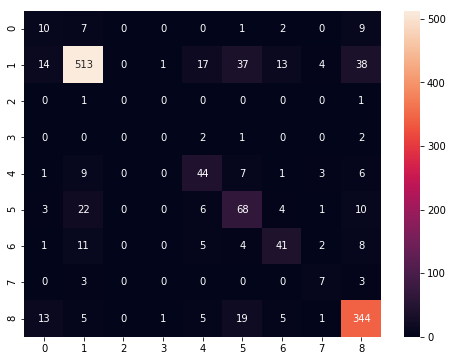

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(rfc_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)

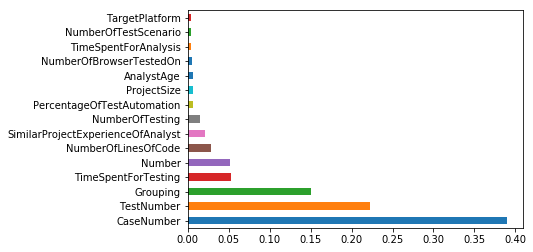

In [12]:
featImportances = pd.Series(data = rfc.feature_importances_,
                            index = EnvironmentalMetricsEncoded.iloc[:,:-1].columns)
featImportances.nlargest(15).plot(kind = 'barh')

## K-NN CLASSIFIER

In [13]:
knc = KNeighborsClassifier(n_neighbors=3,
                           weights='uniform',
                           algorithm='auto',
                           leaf_size=30,
                           p=1)
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

In [14]:
knc_confusion_matrix = confusion_matrix(y_test,knc.predict(X_test))
print(knc_confusion_matrix)
print("K-NN Train Accuracy:", accuracy_score(y_train, knc.predict(X_train)))
print("K-NN Test Accuracy:", accuracy_score(y_test, knc.predict(X_test)))
print("Precision - Recall - F1:", precision_recall_fscore_support(y_test, knc.predict(X_test), labels=np.unique(y_test), average='weighted')[:-1])

[[  5  10   0   0   0   1   0   0  13]
 [  5 577   0   0   7  12   7   1  28]
 [  0   1   0   0   0   0   0   0   1]
 [  0   2   0   0   1   0   0   0   2]
 [  2  27   0   0  31   2   1   2   6]
 [  2  58   0   0   4  36   2   0  12]
 [  0  36   0   0   1   8  24   0   3]
 [  0   6   0   0   0   0   0   5   2]
 [ 11  44   0   0   1   4   7   0 326]]
K-NN Train Accuracy: 0.8934456928838951
K-NN Test Accuracy: 0.7514970059880239
Precision - Recall - F1: (0.7328644557418622, 0.7514970059880239, 0.732250933892023)


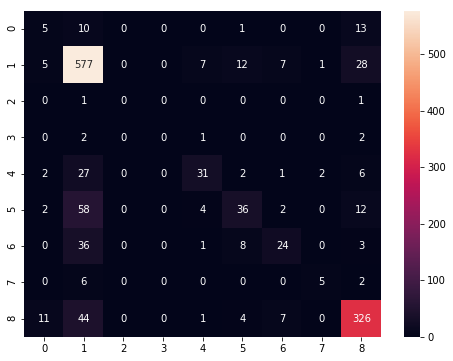

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(knc_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)

## XGBOOST CLASSIFIER

In [16]:
warnings.filterwarnings('ignore')

xgb = XGBClassifier(booster='gbtree',
                    gamma = 3,
                    max_depth = 18,
                    n_estimators = 2000,
                    silent=0,
                    learning_rate = 0.3,
                    subsample = 1.0,
                    colsample_bytree = 0.5,
                    min_child_weight = 5,
                    scale_pos_weight=200)

xgb.fit(X_train, 
        y_train,
        verbose=False,
        early_stopping_rounds=30, 
        eval_metric="mlogloss", 
        eval_set=[(X_train, y_train), (X_test, y_test)])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=3,
              learning_rate=0.3, max_delta_step=0, max_depth=18,
              min_child_weight=5, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=200, seed=None,
              silent=0, subsample=1.0, verbosity=1)

In [17]:
xgb_confusion_matrix = confusion_matrix(y_test, xgb.predict(X_test))
print(xgb_confusion_matrix)
print ("XGBoost Train Accuracy:", accuracy_score(y_train, xgb.predict(X_train)))
print ("XGboost Test Accuracy:", accuracy_score(y_test, xgb.predict(X_test)))
print("Precision - Recall - F1:", precision_recall_fscore_support(y_test, xgb.predict(X_test), labels=np.unique(y_test), average='weighted')[:-1])

[[  1  13   0   0   0   0   0   0  15]
 [  0 591   0   0   4   7   3   0  32]
 [  0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5]
 [  0  39   0   0  19   4   0   0   9]
 [  0  37   0   0   1  46   4   1  25]
 [  0  29   0   0   1   2  29   0  11]
 [  0   8   0   0   0   0   0   0   5]
 [  2  26   0   0   0   3   2   0 360]]
XGBoost Train Accuracy: 0.8247191011235955
XGboost Test Accuracy: 0.7829341317365269
Precision - Recall - F1: (0.759515927168818, 0.7829341317365269, 0.7509231599984239)


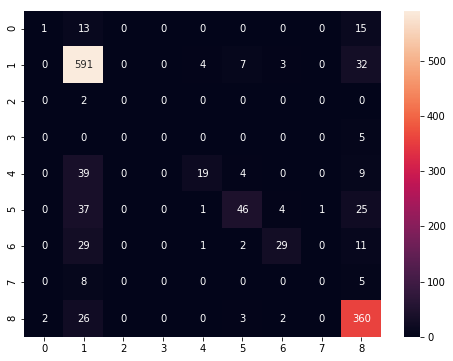

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(xgb_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)

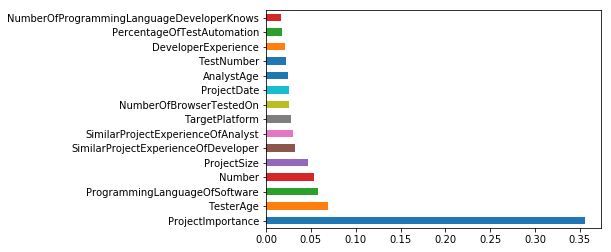

In [19]:
featImportances = pd.Series(data = xgb.feature_importances_,
                            index = EnvironmentalMetricsEncoded.iloc[:,:-1].columns)
featImportances.nlargest(15).plot(kind = 'barh')

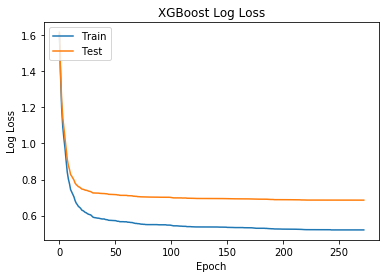

In [20]:
plt.plot(xgb.evals_result()['validation_0']['mlogloss'])
plt.plot(xgb.evals_result()['validation_1']['mlogloss'])
plt.title('XGBoost Log Loss')
plt.ylabel('Log Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## DEEP LEARNING

In [21]:
warnings.filterwarnings('ignore')

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(36, kernel_initializer = 'uniform', activation = 'relu', input_dim = 36))
model.add(Dropout(0.1))

model.add(Dense(54, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(54, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(9, kernel_initializer = 'uniform', activation = 'softmax'))

# summary
model.summary()

W0409 13:37:33.641505 139849149712128 deprecation_wrapper.py:119] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0409 13:37:33.682025 139849149712128 deprecation_wrapper.py:119] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0409 13:37:33.691179 139849149712128 deprecation_wrapper.py:119] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0409 13:37:33.731325 139849149712128 deprecation_wrapper.py:119] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is d

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 36)                1332      
_________________________________________________________________
dropout_1 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 54)                1998      
_________________________________________________________________
dropout_2 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 54)                2970      
_________________________________________________________________
dropout_3 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 495       
Total para

In [22]:
warnings.filterwarnings('ignore')
# Class Weights
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
# Early Stopping
earlyStoppingCallback = [EarlyStopping(monitor='val_loss', patience=20)]
# Compiling the NN
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# Train the NN
model.fit(X_train,
          y_train, 
          batch_size = 32, 
          class_weight=class_weights, 
          epochs = 400, 
          callbacks=earlyStoppingCallback, 
          validation_data=(X_test,y_test),
          verbose=0)

W0409 13:37:49.707405 139849149712128 deprecation_wrapper.py:119] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0409 13:37:49.749363 139849149712128 deprecation_wrapper.py:119] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0409 13:37:49.889738 139849149712128 deprecation.py:323] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


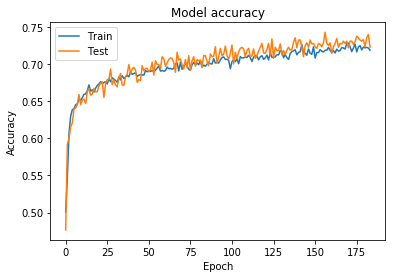

In [23]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
dl_confusion_matrix = confusion_matrix(y_test, np.argmax(model.predict(X_test),axis=1))
print(dl_confusion_matrix)
print ("Neural Train Accuracy:", accuracy_score(y_train, np.argmax(model.predict(X_train), axis=1)))
print ("Neural Test Accuracy:", accuracy_score(y_test, np.argmax(model.predict(X_test), axis=1)))

[[  0  13   0   0   0   0   0   0  16]
 [  0 588   0   0   1   3   4   1  40]
 [  0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5]
 [  0  55   0   0   2   4   0   0  10]
 [  0  63   0   0   1  28   1   1  20]
 [  0  33   0   0   2   0  21   2  14]
 [  0   6   0   0   0   0   0   0   7]
 [  0  63   0   0   1   2   1   0 326]]
Neural Train Accuracy: 0.7443820224719101
Neural Test Accuracy: 0.7223053892215568


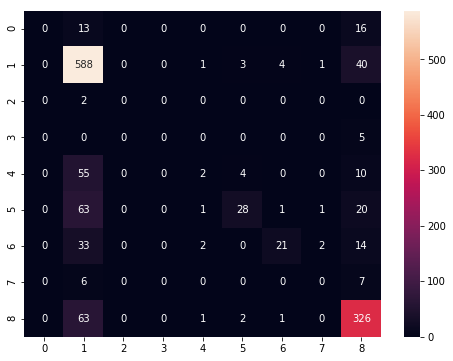

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(dl_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)